<a href="https://colab.research.google.com/github/nirmalaraj77/Python/blob/main/Introduction_to_Statistics_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summary Statistics**
* df.describe()

## **Descriptive Statistics**
* Describe and summarize data

## **Inferential Statistics**
* Use a sample of data to make inferences about a larger population

## **Numeric (Quantitative Data)**
* Summary statistics
* Scatterplots

### **Continous (Measured)**
* Airplane speed
* Time spent waiting in line

### **Discrete (Counted)**
* Number of pets
* Number of packages shipped

## **Categorical (Qualitative Data)**
* **Can be represented as numbers**
* **Does not make rthem numeric variables**
* Countplot
* Barplot

### **Nominal (Unordered)**
* Married / Unmarried (1 / 0)
* Country of residence (1, 2, 3, ...)

### **Ordinal (Ordered)**
* Survey question (Strongly disagree - 1 / Neither - 2 / Strongly agree - 3)




In [48]:
# import libraries and datasets
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

deals = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/amir_deals.csv')
happiness = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/world_happiness.csv')
food = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/food_consumption.csv')

# **Measures of Center**

## **Mean**
* Average
* np.mean
* More sensitive to outliers
* Gets pulled in the direction of skew

## **Median**
* Centre
* 50% | 50%
* Sort and take middle
* np.median
* Better for skewed data

## **Mode**
* Most frequent value
* statistics.mode
* Often used for categtrical variables


In [2]:
# Mean, Median and Mode in Numerical Variables

mean = np.mean(deals['amount'])
median = np.median(deals['amount'])
mode = statistics.mode(deals['amount'])

print(f"Mean: {mean} | Median: {median} | Mode: {mode}")



Mean: 4812.000337078652 | Median: 4805.1900000000005 | Mode: 7389.52


In [10]:
# Mode in Categorical Variable
statistics.mode(deals['product'])


'Product B'

   country food_category  consumption  co2_emission
55     USA          pork        27.64         97.83
56     USA       poultry        50.01         53.72
57     USA          beef        36.24       1118.29
58     USA     lamb_goat         0.43         15.06
59     USA          fish        12.35         19.72


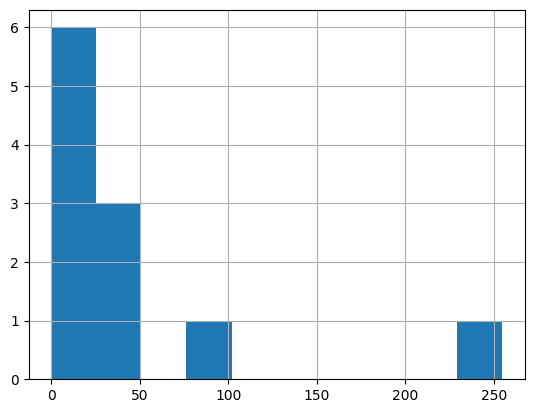

mean      156.26
median     15.34
Name: co2_emission, dtype: float64


<ipython-input-19-c103184923d3>:7: FutureWarning: The provided callable <function mean at 0x7cba4ede95a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(food[food['country']== 'USA']['co2_emission'].agg([np.mean, np.median]))
<ipython-input-19-c103184923d3>:7: FutureWarning: The provided callable <function median at 0x7cba4bb14ca0> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(food[food['country']== 'USA']['co2_emission'].agg([np.mean, np.median]))


In [19]:
usa = food[food['country'] == 'USA']
print(usa.head())

usa['consumption'].hist()
plt.show()

print(food[food['country']== 'USA']['co2_emission'].agg([np.mean, np.median]))

# **Measures of Spread**

## **Variance**
* Average distance from each data point to mean
* Calculate distance between each data point and mean
* Divide sum of squared diatances by number of data points - 1
* Higher variance = more spread out data
* np.var
* np.var['values], ddof=1
* ddof = 1 for sample data
* Population variance is calculated without ddof argument

# **Standard Deviation**
* Square root of Variance
* np.std
* ddof = 1
* Easier to understand since they are not squared

## **Mean absolute deviation**
* Takes absolute value of distances to mean and takes mean of those differences
* Similar to SD but not same
* SD squares distances, penalizing longer distances more than shorter ones
* MAD penalizes each distance equally
* SD is more common than MAD

## **Quantiles (Percentiles)**
* Split data into some number of equal parts
* np.quantile
* np.quantile(msleep['sleep_total'], 0.5)
* 0.5 Quantile = Median
* Split data into 4 equal parts = Quartiles
* np.quantile(msleep['sleep_total'], [0, 0.25, 0.05, 0.75, 1)
* Boxplots use quartiles
* np.linspace (start, stop, num_intervals)

## **Interquartile Range (IQR)**
* Distance between 25th and 75th percentile
* from scipy.stats import iqr
* iqr(msleep['sleep_total'])

## **Outliers**
* Data points substantially different from the others
* data < Q1 - 1.5 X IQR or
* data > Q3 + 1.5 X IQR
* Find 1st and 3rd percentile and IQR and subset





In [40]:
var = np.var(food['co2_emission'], ddof=1)

std = np.std(food['co2_emission'],ddof=1)

# Calculate Mean Absolute Deviation
dists = food['co2_emission'] - np.mean(food['co2_emission'])
mad = np.mean(np.abs(dists))


qrt = np.quantile(food['co2_emission'], [0, 0.25, 0.5, 0.75, 1])
iqr_value = iqr(food['co2_emission'])
print(f"Variance: {var} | Standard Deviation: {std}\n Quartiles: {qrt} | IQR {iqr_value} | MAD : {mad}")

Variance: 23133.973638558353 | Standard Deviation: 152.09856553747755
 Quartiles: [   0.        5.21     16.53     62.5975 1712.    ] | IQR 57.3875 | MAD : 89.68155844295565


In [53]:
# Find Outliers
from scipy.stats import iqr

# Find IQR
iqr = iqr(food['co2_emission'])

# Find lower and upper thresholds
lower_threshold = np.quantile(food['co2_emission'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(food['co2_emission'], 0.75) + 1.5 * iqr

# Subset to find outliers
food_outliers = food[(food['co2_emission'] < lower_threshold) | (food['co2_emission'] > upper_threshold)]
print(food_outliers.value_counts())


country           food_category  consumption  co2_emission
Albania           beef           22.50        694.30          1
                  dairy          303.72       432.62          1
Myanmar           rice           132.80       169.94          1
Nepal             beef           7.89         243.47          1
Netherlands       beef           17.67        545.26          1
                                                             ..
French Polynesia  beef           30.90        953.51          1
Georgia           beef           6.04         186.38          1
                  dairy          149.26       212.61          1
Germany           beef           13.16        406.09          1
Zimbabwe          beef           7.37         227.42          1
Name: count, Length: 208, dtype: int64


In [54]:
food['co2_emission'].describe()

,co2_emission
count,1430.000000
mean,74.383993
std,152.098566
min,0.000000
25%,5.210000
50%,16.530000
75%,62.597500
max,1712.000000
